<a href="https://colab.research.google.com/github/wisdom3D/pandas/blob/main/dapaong_pluviom_trie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

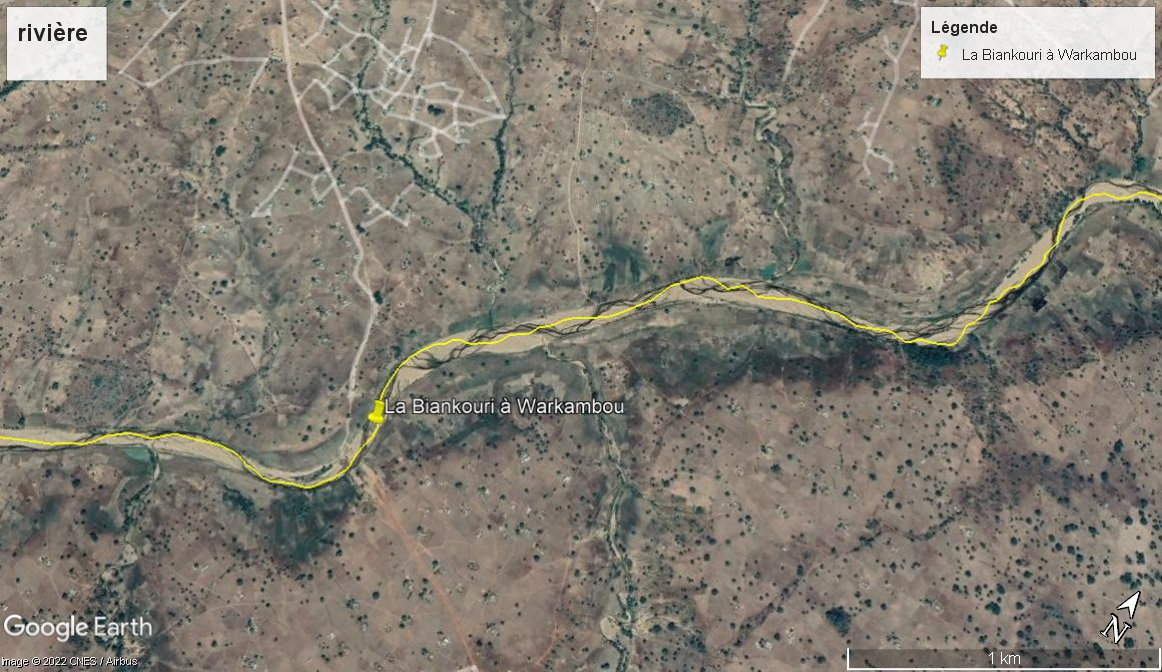

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('/content/PLUVIOMETRIE & TEMPERATURE  DAPAONG 1981-2020.xlsx')

In [ ]:
data.head()

,ANNEES,MOIS,JOURS,PLUIE,Tmax,Tmin
0,2000,1,1,0.0,34.1,23.7
1,2000,1,2,0.0,31.2,24
2,2000,1,3,0.0,30.7,22.8
3,2000,1,4,0.0,32.3,20.2
4,2000,1,5,0.0,31.3,20.8


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ANNEES  7672 non-null   int64  
 1   MOIS    7672 non-null   int64  
 2   JOURS   7672 non-null   int64  
 3   PLUIE   7672 non-null   float64
 4   Tmax    7672 non-null   float64
 5   Tmin    7672 non-null   object 
dtypes: float64(2), int64(3), object(1)
memory usage: 359.8+ KB


In [ ]:
data.shape

(7672, 6)

nous avons 7672 données de pluie et de temperature sur une durée de 1981 a 2020

In [ ]:
data.isnull().sum()

ANNEES    0
MOIS      0
JOURS     0
PLUIE     0
Tmax      0
Tmin      0
dtype: int64

il n'y a ici aucune donnée manqante ou incomplète

In [ ]:
data.describe()

,ANNEES,MOIS,JOURS,PLUIE,Tmax
count,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000
mean,2010.000912,6.522028,15.736314,3.191129,34.978421
std,6.056474,3.449021,8.801639,15.093258,24.548725
min,2000.000000,1.000000,1.000000,0.000000,11.500000
25%,2005.000000,4.000000,8.000000,0.000000,30.500000
50%,2010.000000,7.000000,16.000000,0.000000,33.500000
75%,2015.000000,10.000000,23.000000,0.000000,36.300000
max,2020.000000,12.000000,31.000000,804.000000,390.000000


In [ ]:
data.duplicated().sum()

0

et aussi il n'y a pas de donnée en double

In [ ]:
data.drop(6634, inplace = True)

In [ ]:
data[(data['ANNEES'] == 2018) & (data['MOIS'] == 2) & (data['JOURS'] == 29)]

,ANNEES,MOIS,JOURS,PLUIE,Tmax,Tmin
6634,2018,2,29,0.0,38.0,26.5


nous avons supprimer deux dates 2017/2/29 et 2018/2/29 car elles sont érronées

In [ ]:
data['DATE'] = data['ANNEES'].astype('str') + '-'  + data['MOIS'].astype('str') + '-' + data['JOURS'].astype('str')
data['DATE'] = pd.to_datetime(data['DATE'])

In [ ]:
data

,ANNEES,MOIS,JOURS,PLUIE,Tmax,Tmin,DATE
0,2000,1,1,0.0,34.1,23.7,2000-01-01
1,2000,1,2,0.0,31.2,24,2000-01-02
2,2000,1,3,0.0,30.7,22.8,2000-01-03
3,2000,1,4,0.0,32.3,20.2,2000-01-04
4,2000,1,5,0.0,31.3,20.8,2000-01-05
...,...,...,...,...,...,...,...
7667,2020,12,27,0.0,20.5,33.7,2020-12-27
7668,2020,12,28,0.0,20.0,33.5,2020-12-28
7669,2020,12,29,0.0,20.0,34,2020-12-29
7670,2020,12,30,0.0,21.5,34.5,2020-12-30


In [ ]:
data.set_index('DATE', inplace = True)

In [ ]:
data.describe()

,ANNEES,MOIS,JOURS,PLUIE,Tmax
count,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000
mean,2009.998957,6.523207,15.732855,3.191961,34.977307
std,6.056047,3.448698,8.800180,15.095138,24.551820
min,2000.000000,1.000000,1.000000,0.000000,11.500000
25%,2005.000000,4.000000,8.000000,0.000000,30.500000
50%,2010.000000,7.000000,16.000000,0.000000,33.500000
75%,2015.000000,10.000000,23.000000,0.000000,36.300000
max,2020.000000,12.000000,31.000000,804.000000,390.000000


In [ ]:
data.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


ANNEES     36.675706
MOIS       11.893515
JOURS      77.443163
PLUIE     227.863203
Tmax      602.791873
dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7670 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ANNEES  7670 non-null   int64         
 1   MOIS    7670 non-null   int64         
 2   JOURS   7670 non-null   int64         
 3   PLUIE   7670 non-null   float64       
 4   Tmax    7670 non-null   float64       
 5   Tmin    7670 non-null   object        
 6   DATE    7670 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 479.4+ KB


In [ ]:
data['Tmin'].astype('float64')

In [ ]:
data[data['Tmin'] == '3 7,1']

,ANNEES,MOIS,JOURS,PLUIE,Tmax,Tmin,DATE


In [ ]:
data['Tmin'].replace({'3 7,1' : 37.1}, inplace = True)

In [ ]:
#data.Tmin.astype('float64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7670 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ANNEES  7670 non-null   int64         
 1   MOIS    7670 non-null   int64         
 2   JOURS   7670 non-null   int64         
 3   PLUIE   7670 non-null   float64       
 4   Tmax    7670 non-null   float64       
 5   Tmin    7670 non-null   object        
 6   DATE    7670 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 479.4+ KB


In [ ]:
data.shape

(7670, 7)

In [ ]:
data.to_csv('pluie-temperature-Dapaong')

In [ ]:
data.head()

,ANNEES,MOIS,JOURS,PLUIE,Tmax,Tmin
DATE,,,,,,
2000-01-01,2000,1,1,0.0,34.1,23.7
2000-01-02,2000,1,2,0.0,31.2,24
2000-01-03,2000,1,3,0.0,30.7,22.8
2000-01-04,2000,1,4,0.0,32.3,20.2
2000-01-05,2000,1,5,0.0,31.3,20.8


In [ ]:
data.PLUIE.max()

804.0

In [ ]:
data.PLUIE.min()

0.0

In [ ]:
data.PLUIE.mean()

3.1919612849419265

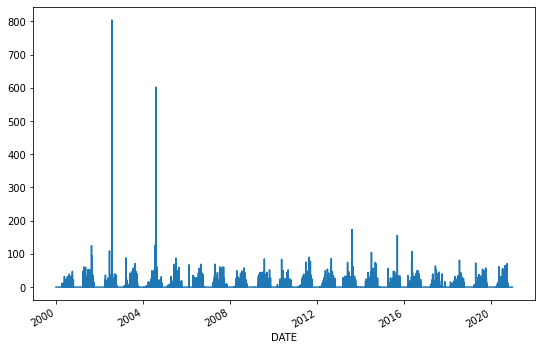

In [ ]:
data['PLUIE'].plot(figsize = (9, 6))

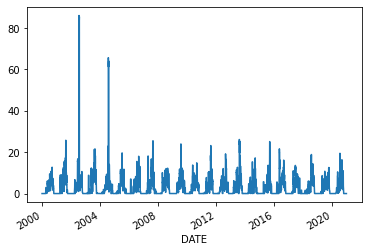

In [ ]:
data.loc['2000': '2021', 'rolling_PLUIE'].plot()

Variation de 2000 à 2021

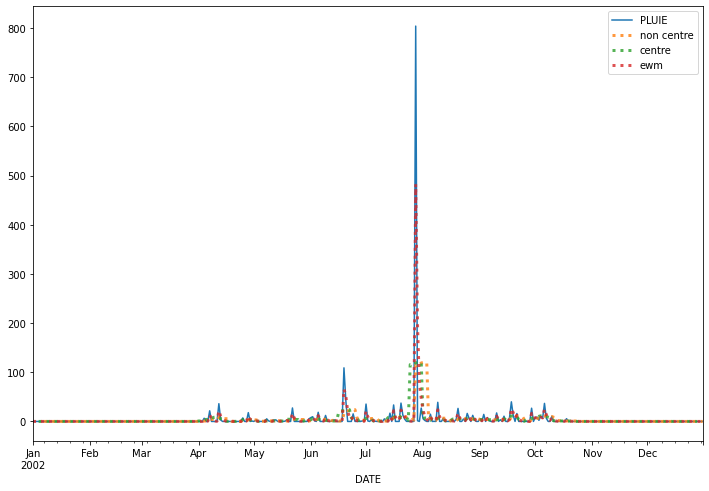

In [ ]:
plt.figure(figsize=(12, 8))
data.loc['2002', 'PLUIE'].plot()
data.loc['2002', 'PLUIE'].rolling(window=7).mean().plot(label='non centre', lw=3, ls=':', alpha=0.8)
data.loc['2002', 'PLUIE'].rolling(window=7, center=True).mean().plot(label='centre', lw=3, ls=':', alpha=0.8)
data.loc['2002', 'PLUIE'].ewm(alpha=0.6).mean().plot(label='ewm', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

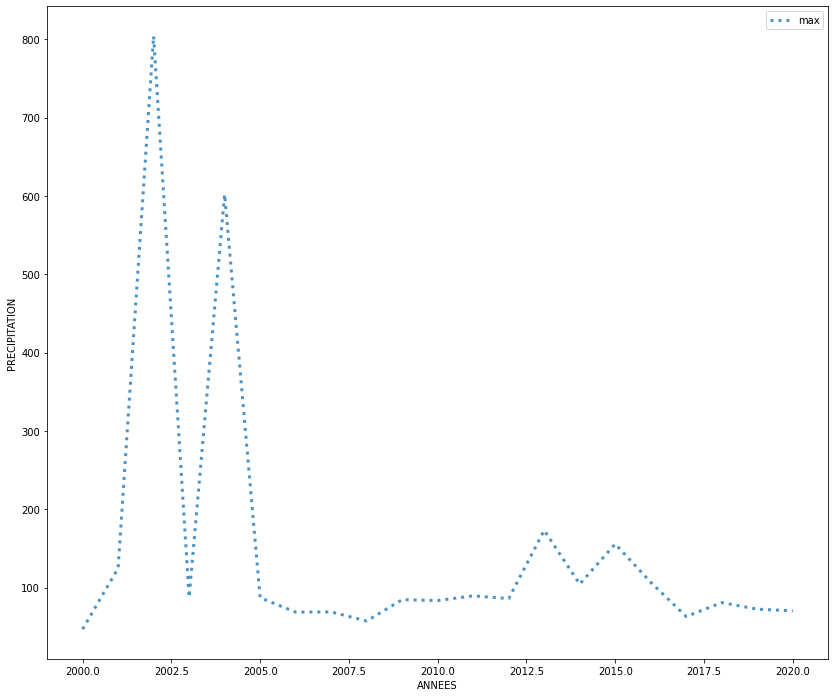

In [ ]:
plt.figure(figsize=(14, 12))
data.groupby('ANNEES')['PLUIE'].max().plot(label='max', lw=3, ls=':', alpha=0.8)
plt.ylabel('PRECIPITATION')
plt.legend()
plt.show()

création de la moyenne mobile  Pour certifier la fiabilité des données et leur homogénéité

In [ ]:
data['rolling_PLUIE'] = data['PLUIE'].rolling(window = 10 ).mean()
data.sample(5)

,ANNEES,MOIS,JOURS,PLUIE,Tmax,Tmin,rolling_PLUIE
DATE,,,,,,,
2010-02-22,2010,2,22,0.0,40.5,28.3,0.00
2002-01-16,2002,1,16,0.0,32.2,19.9,0.00
2011-05-06,2011,5,6,14.6,38.2,20.5,4.50
2014-12-26,2014,12,26,0.0,32.0,16.6,0.00
2016-05-10,2016,5,10,30.5,37.0,23.5,4.55


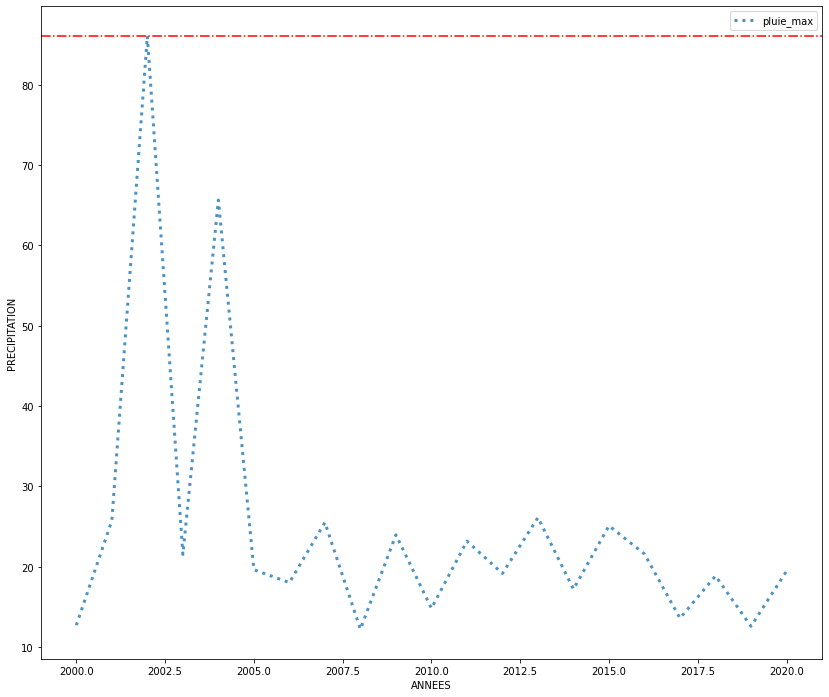

In [ ]:
plt.figure(figsize=(14, 12))
data.groupby('ANNEES')['rolling_PLUIE'].max().plot(label='pluie_max', lw=3, ls=':', alpha=0.8)
plt.axhline(y=data['rolling_PLUIE'].max(), color='r', linestyle='dashdot')
plt.ylabel('PRECIPITATION')
plt.legend()
plt.show()

DATE
2000-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2001-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2002-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2003-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2004-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2005-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2006-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2007-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2008-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2009-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2010-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2011-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2012-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2013-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2014-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2016-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-12-31    AxesSubplot(

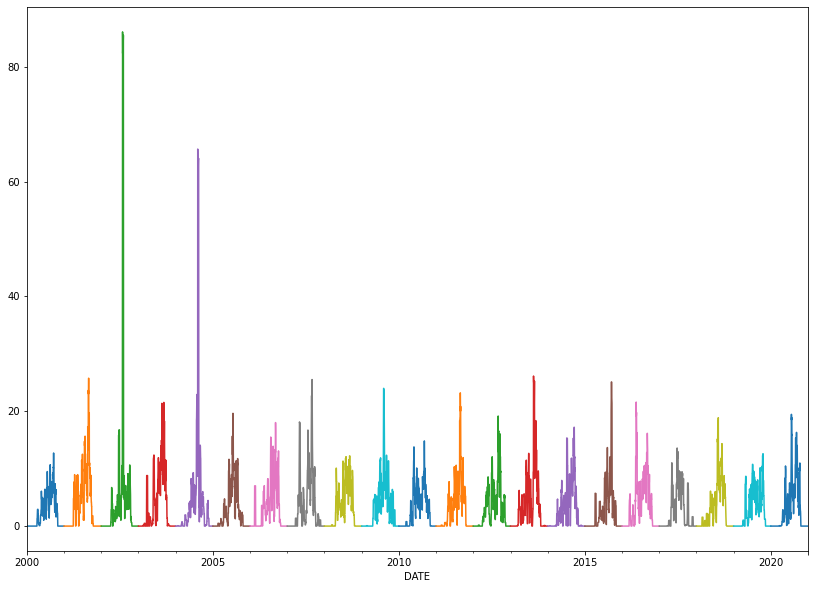

In [ ]:
data['rolling_PLUIE'].resample('Y').plot(figsize = (14, 10))

visualistion de la quantité de pluie de 2000 a 2020 le pic se trouvre en 2002

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


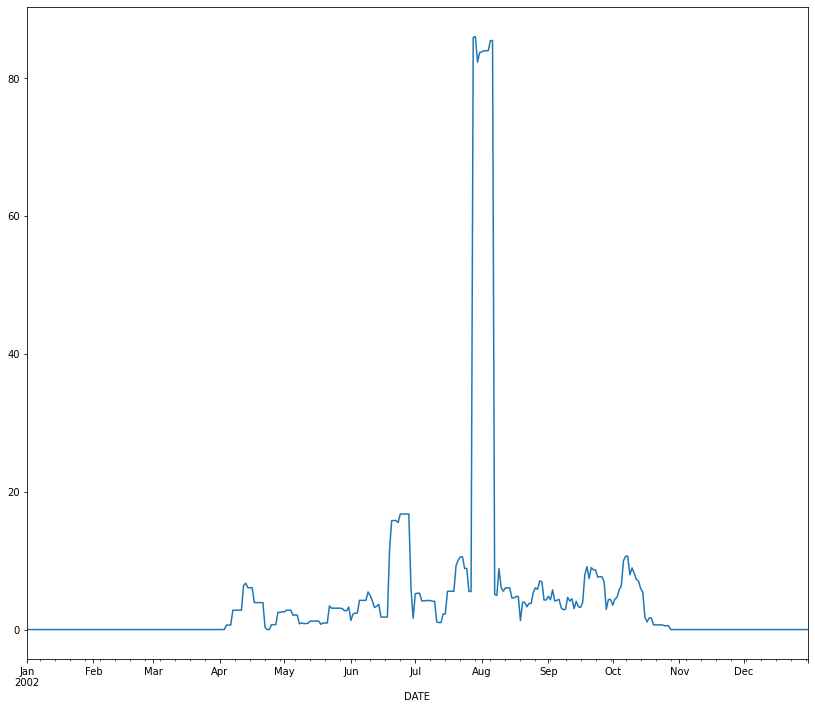

In [ ]:
data['2002']['rolling_PLUIE'].plot(figsize = (14, 12))

Visualisation de la pluie tout au long de l'année 2002

In [ ]:
data.MOIS.replace({1:'Jan', 2: 'Feb', 3: 'Mar', 4:'Apr',
                5:'May', 6:'Jun', 7:'Jul', 8:'Aug',
                 9:'Sep',10:'Oct',11:'Nov',12:'Dec'}, inplace=True)

Text(0, 0.5, 'PRECIPITATION')

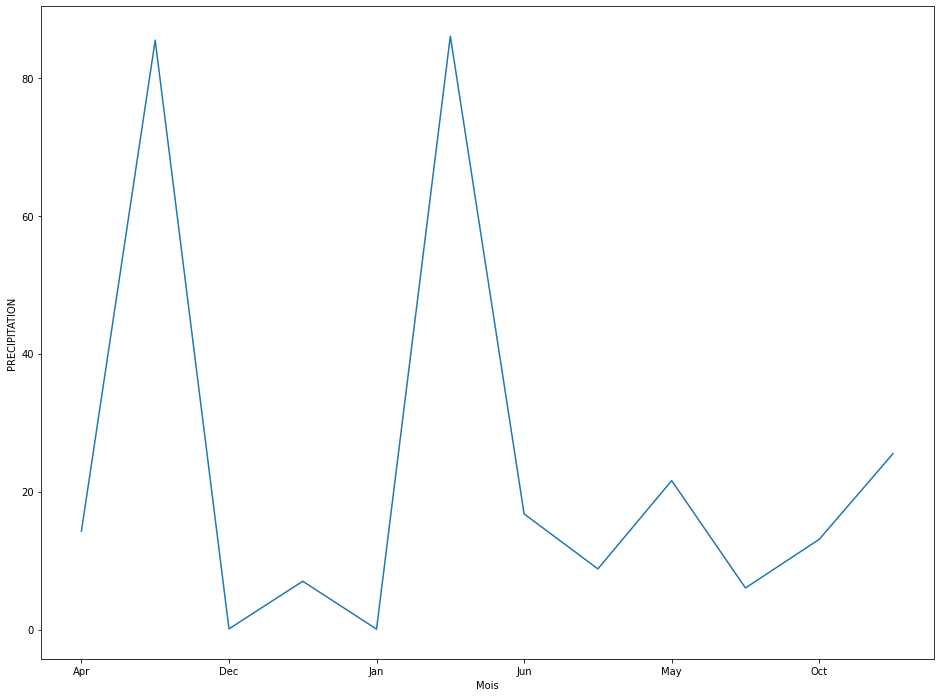

In [ ]:
data.set_index('MOIS')
plt.figure(figsize=(16, 12))
data.groupby('MOIS')['rolling_PLUIE'].max().plot(use_index = True)
plt.xlabel('Mois')
plt.ylabel('PRECIPITATION')
#data.groupby('MOIS')['rolling_PLUIE'].max().plot(kind = 'bar', color = 'r')

 selon le graphe il y a une forte variation croissante de la pluie de juin a juillet puis une petite baisse en Août puis elle baisse a fur et a mesue jusqu'en decembre

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


DATE
2002-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2002-02-28    AxesSubplot(0.125,0.125;0.775x0.755)
2002-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2002-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2002-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2002-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2002-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2002-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2002-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
2002-10-31    AxesSubplot(0.125,0.125;0.775x0.755)
2002-11-30    AxesSubplot(0.125,0.125;0.775x0.755)
2002-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: M, Name: rolling_PLUIE, dtype: object

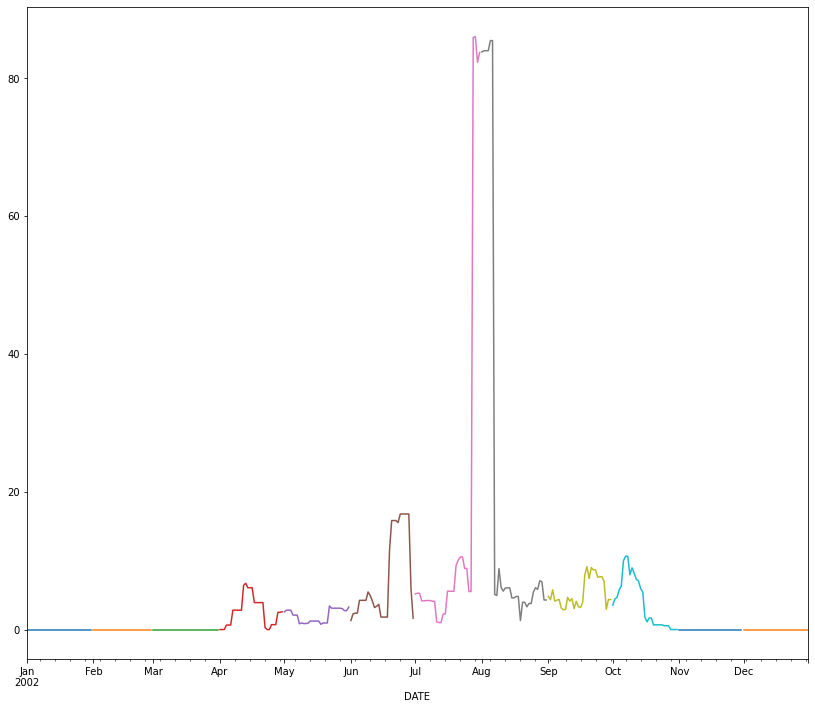

In [ ]:
data['2002']['rolling_PLUIE'].resample('M').plot(figsize = (14, 12))

Visualisation de la pluie tout au long de l'année 2002 selon les mois. le graphe montre que le maximum se retrouve en Août

In [ ]:
pluiemaxa = data.groupby('ANNEES').max()
pluiemaxa.sort_values(ascending = False, by = 'rolling_PLUIE')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


,MOIS,JOURS,PLUIE,Tmax,rolling_PLUIE
ANNEES,,,,,
2002,Sep,31,804.0,41.0,86.06
2004,Sep,31,602.0,390.0,65.66
2013,Sep,31,173.3,41.5,26.13
2001,Sep,31,124.9,41.2,25.76
2007,Sep,31,69.2,40.3,25.52
2015,Sep,31,155.9,41.2,25.11
2009,Sep,31,84.8,40.2,23.98
2011,Sep,31,89.7,40.5,23.20
2016,Sep,31,107.0,41.0,21.60


Classement des années selon la hauteur de précipition

In [ ]:
pluiemax = data['2002'].groupby('MOIS').max()
pluiemax.sort_values(ascending = False, by = 'rolling_PLUIE')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,ANNEES,JOURS,PLUIE,Tmax,Tmin,rolling_PLUIE
MOIS,,,,,,
Jul,2002,31,804.0,33.3,25.0,86.06
Aug,2002,31,38.9,32.0,24.0,85.47
Jun,2002,30,109.0,36.0,26.2,16.77
Oct,2002,31,36.7,36.1,25.0,10.64
Sep,2002,30,39.9,33.0,24.5,9.13
Apr,2002,30,36.1,41.0,29.6,6.72
May,2002,31,27.4,38.5,28.5,3.42
Dec,2002,31,0.0,37.7,25.0,0.00
Feb,2002,28,0.0,38.5,26.3,0.00


Classement des mois de l'anné avec le plus grand volume de precipitation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


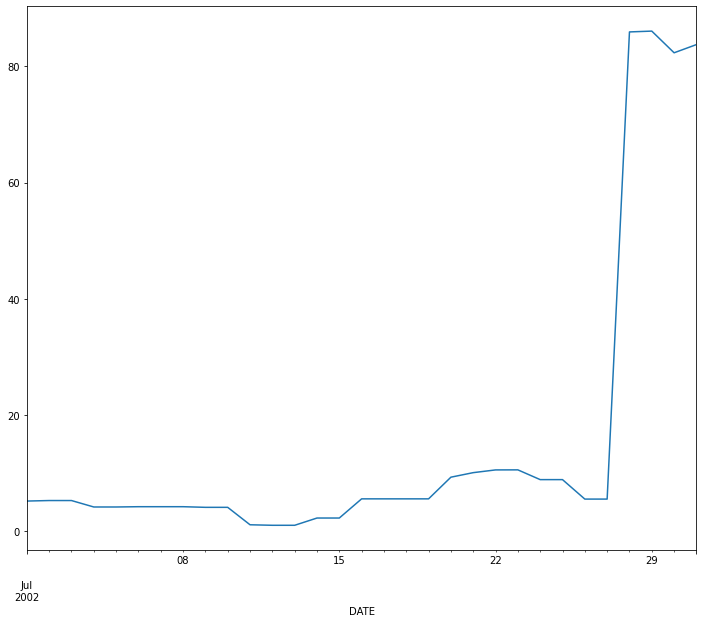

In [ ]:
data['2002-7']['rolling_PLUIE'].plot(figsize=(12, 10))

la visualisation de la variation de pluie dans ce mois d'Août de 2002 nous montre que le plus grand taux est au 9 du mois

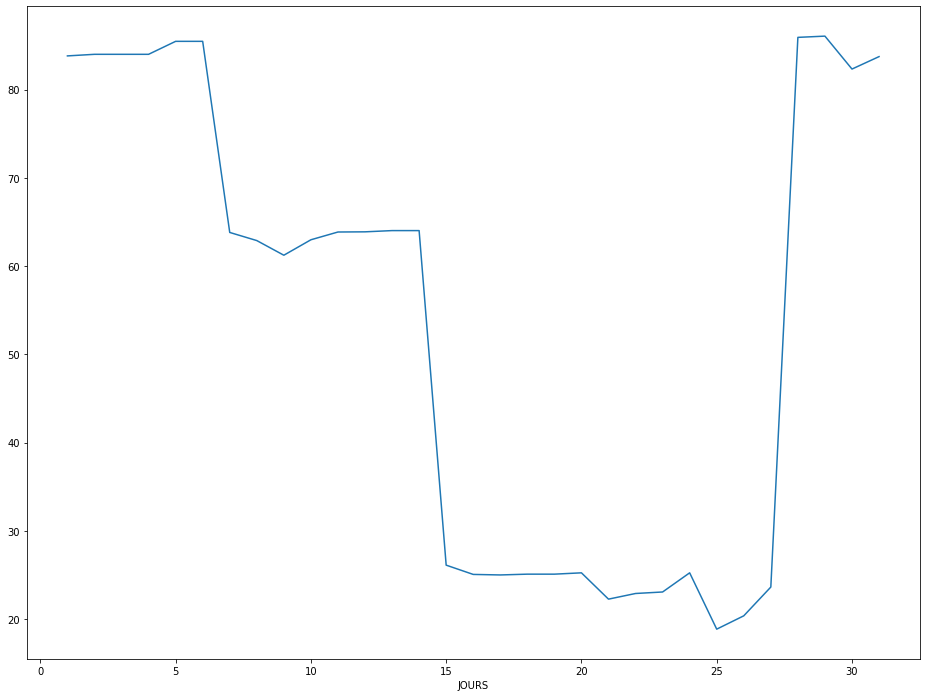

In [ ]:
data.groupby('JOURS')['rolling_PLUIE'].max().plot(figsize=(16, 12))

variasion journaliere de la pluie sur 30 jours

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


DATE
2020-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-02-29    AxesSubplot(0.125,0.125;0.775x0.755)
2020-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2020-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
2020-10-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-11-30    AxesSubplot(0.125,0.125;0.775x0.755)
2020-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: M, Name: rolling_PLUIE, dtype: object

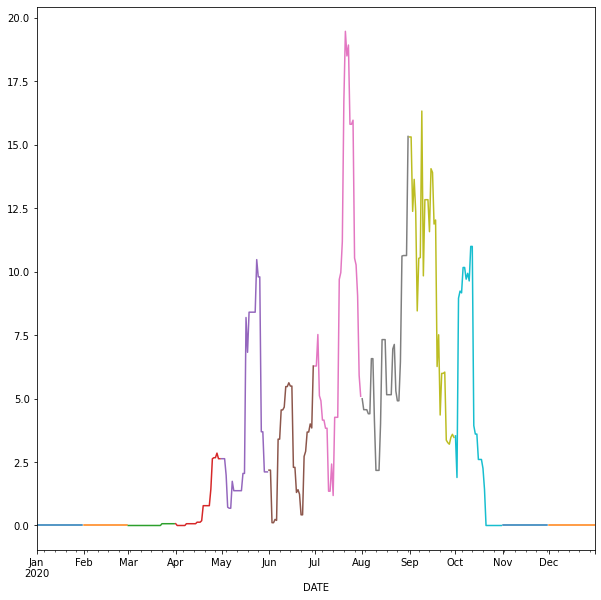

In [ ]:
data['2020']['rolling_PLUIE'].resample('M').plot(figsize=(10, 10))

Variation de la pluie au cour de la derniere année 2020

In [ ]:
def volumemax(x):
  pluieAns = data.groupby(x)['PLUIE'].sum()
  pluieAns.plot(kind = 'bar', figsize = (10, 7))
  plt.axhline(y=pluieAns.max(), color='g', linestyle='dashdot')
  print("le max par" ,x ,"est :", pluieAns.max(), "mm")

le max par ANNEES est : 1756.6000000000001 mm


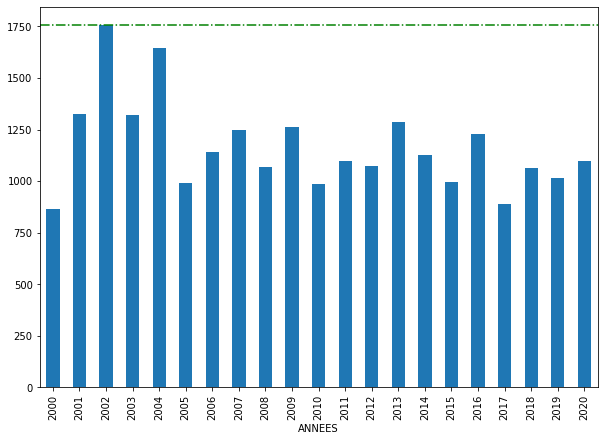

In [ ]:
volumemax('ANNEES')

le max par MOIS est : 6057.300000023172 mm


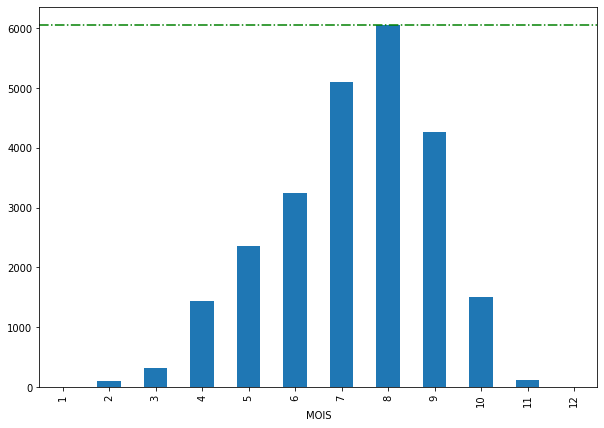

In [ ]:
volumemax('MOIS')

le max par JOURS est : 1683.655555556598  mm


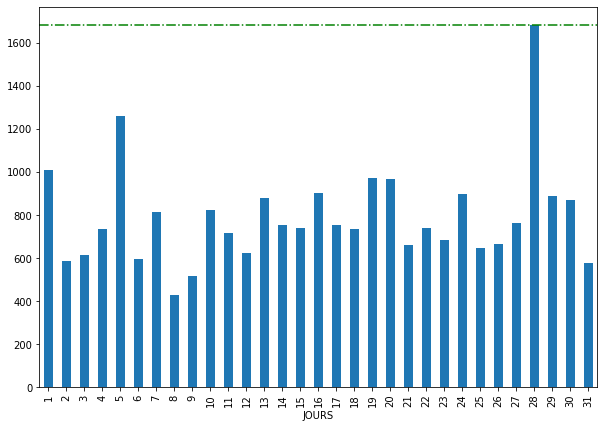

In [ ]:
volumemax('JOURS')

In [ ]:
data.Tmax.min()

11.5

In [ ]:
data.Tmax.max()

390.0

In [ ]:
data.Tmax.mean()

34.97730710292726

In [ ]:
def volumemaxT(x):
  TAns = data.groupby(x)['Tmax'].sum()
  TAns.plot(kind = 'bar', figsize = (10, 7))
  plt.axhline(y=TAns.max(), color='g', linestyle='dashdot')
  print("le max par" ,x ,"est :", TAns.max(), "°C")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


DATE
2020-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-02-29    AxesSubplot(0.125,0.125;0.775x0.755)
2020-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2020-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
2020-10-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-11-30    AxesSubplot(0.125,0.125;0.775x0.755)
2020-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: M, Name: Tmax, dtype: object

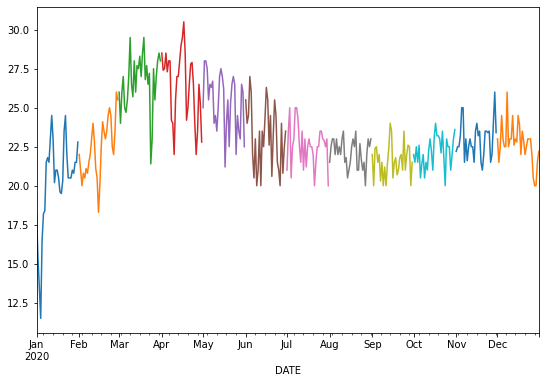

In [ ]:
data['2020']['Tmax'].resample('M').plot(figsize = (9, 6))

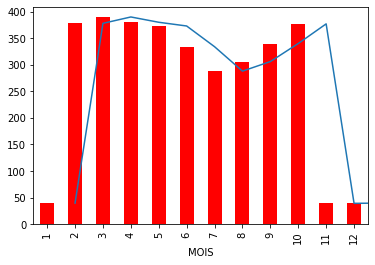

In [ ]:
data.groupby('MOIS')['Tmax'].max().plot()
data.groupby('MOIS')['Tmax'].max().plot(kind = 'bar', color = 'r')

le max par ANNEES est : 26653.9 °C


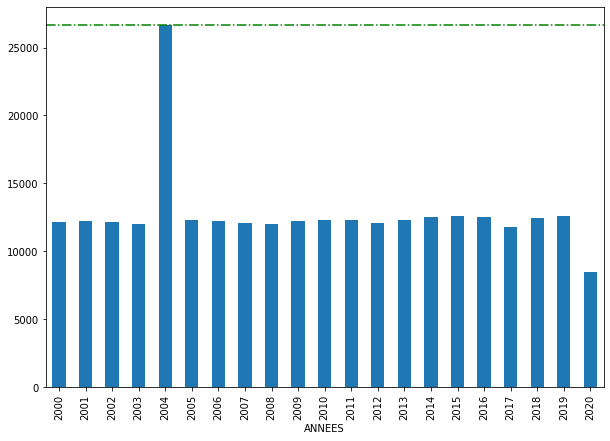

In [ ]:
volumemaxT('ANNEES')

le max par MOIS est : 27473.1 °C


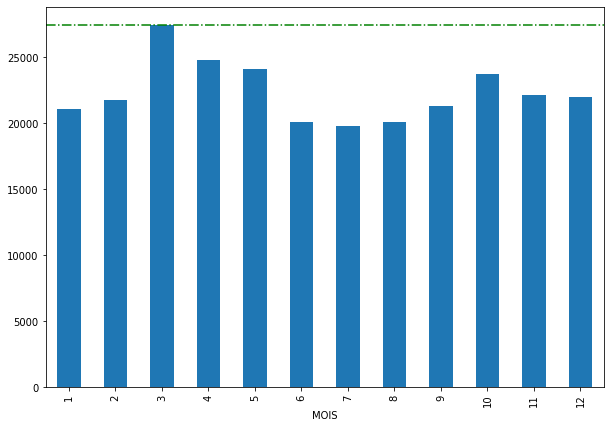

In [ ]:
volumemaxT('MOIS')

le max par JOURS est : 9499.4 °C


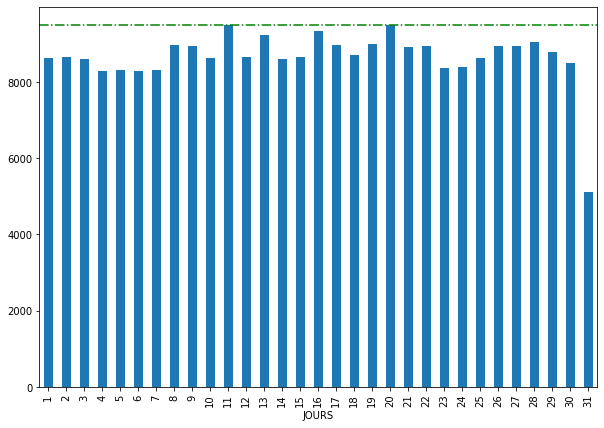

In [ ]:
volumemaxT('JOURS')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


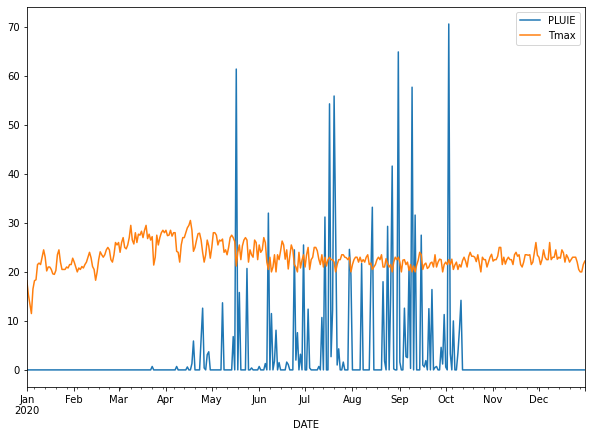

In [ ]:
data['2020'][["PLUIE", "Tmax"]].plot(figsize= (10, 7))

variation de la Temperature et de des precipitations sur 2020

In [ ]:
correlation = data[['PLUIE', 'Tmax']].corr()

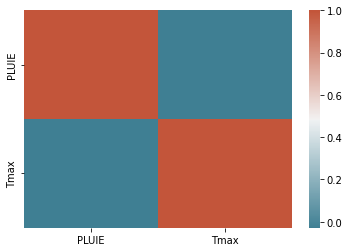

In [ ]:
sns.heatmap(correlation, cmap = sns.diverging_palette(220, 20, as_cmap = True))

In [ ]:
!jupyter nbconvert -- to html /content/Dapaong_pluviométrie.ipynb

[NbConvertApp] WARNING | pattern 'to' matched no files
[NbConvertApp] WARNING | pattern 'html' matched no files
[NbConvertApp] Converting notebook /content/Dapaong_pluviométrie.ipynb to html
[NbConvertApp] Writing 1860416 bytes to /content/Dapaong_pluviométrie.html


In [ ]:
df = pd.read_csv('/content/data_bassin.csv')
df_c = df.copy()
df_c.rename(columns = {'Column1' : 'N°', 'Column2' : 'Code ORSTOM', 'Column3' : 'Ensemble', 'Column4' : 'Station', 'Column5' : 'Latitude',
                       'Column6' : 'Latitude', 'Column7' : 'Latitude', 'Column8' : 'Latitude', 'Column9' : 'Longitude', 'Column10' : 'Longitude',
                       'Column11' : 'Longitude', 'Column12' : 'Longitude', 'Column13' : 'S', 'Column14' : 'L', 'Column15' : 'Icomp',
                       'Column16' : 'Dd', 'Column17' : 'Ig', 'Column18' : 'Pan', 'Column19' : 'P10', 'Column20' : 'Pm10',
                       'Column21' : 'P24obs', 'Column22' : 'Qobs', 'Column23' : 'Kr,obs', 'Column24' : 'Kr,obs', 'Column25' : 'Kr10', 'Column26' : 'Kr10', 'Column27' : 'Q10',
                       'Column28' : 'Q10', 'Column29' : 'Q10 Spec', 'Column30' : 'Q10 Spec', 'Column31' : 'Qobs/Q10',
                       'Column32' : 'alpha', 'Column33' : 'Tb', 'Column34' : 'Tm', 'Column35' : 'Tc',
                       }, inplace = True)

In [ ]:

#df.sort_values('Column1')
#df_c.Column1.astype('float')
#df_c[df_c['Column1'] == 'N°'].iloc[: , 10:26] 
#df_c.drop(55, inplace = True)
df_c_TOGO = df_c[(df_c['N°'] == '1') | (df_c['N°'] == '2') | (df_c['N°'] == '3') | (df_c['N°'] == '4')]
df_c_TOGO

In [ ]:
df_c_TOGO = df_c[(df_c['Ensemble'] == 'Fosse aux lions') | (df_c['Ensemble'] == 'NADJOUNDI') | (df_c['Ensemble'] == 'KOIMEPOUARBAGA') | (df_c['Ensemble'] == 'LAKTAON') | (df_c['Ensemble'] == 'HIDENWOU') | (df_c['Ensemble'] == 'KOZA')]
df_c_TOGO.to_csv('bassin_TOGO')

In [ ]:
df_c_TOGO.iloc[:3, 20:]

,P24obs,Qobs,"Kr,obs","Kr,obs",Kr10,Kr10,Q10,Q10,Q10 Spec,Q10 Spec,Qobs/Q10,alpha,Tb,Tm,Tc
4,NaN,NaN,NaN,NaN,NaN,20.0,20.0,70.00,70.00,0.37,NaN,NaN,5000,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,30.0,30.0,35.00,35.00,0.57,NaN,NaN,NaN,NaN,NaN
6,86.6,20.00,20.00,19.3,19.3,23.9,23.9,38.00,38.00,0.40,0.53,2.20,2900,1200,NaN


In [ ]:
df = pd.read_csv('/content/N° et Code ORSTOM par Ensemble et Station.csv')
df.iloc[:, 20:]

,"Kr,obs_7",Kr10,Kr10_8,Q10,Q10 Spec,Q10 Spec_10,Q10_9,Qobs/Q10,alpha,Tb,Tm,Tc,N°,Code ORSTOM,Station
0,27.3,27.3,33.3,33.3,23.0,4.09,23.0,0.43,3.0,600,180,230.0,7,1473599052,Station 2
1,27.0,27.0,31.5,31.5,14.0,2.64,14.0,0.44,2.5,630,180,350.0,7,1472799051,Station 1
2,14.1,14.1,12.7,12.7,65.0,1.25,65.0,0.73,2.4,240,100,150.0,6,1472701405,DZOGBEGAN
3,11.7,11.7,13.8,13.8,60.0,2.00,60.0,0.45,3.0,420,75,NaN,5,1472799011,BAFILO
